In [1]:
import pandas as pd

df = pd.read_csv("zomato.csv")

print ("The shape of the dataset is " ,df.shape) 
print ("All the columns in the dataset are respectively---")
print (df.columns)


The shape of the dataset is  (51717, 17)
All the columns in the dataset are respectively---
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [2]:

missing = df.isnull().sum()
percentage_missing = (missing / 51717) * 100 
print ("Percentage of missing values in each column--")
print (percentage_missing.sort_values(ascending=False))
duplicate_values = df.duplicated().sum()
print ("The total no of duplicate values are " ,duplicate_values)

Percentage of missing values in each column--
dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
url                             0.000000
address                         0.000000
votes                           0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64
The total no of duplicate values are  0


In [3]:
df = df.dropna(subset=["location"])
df = df.dropna(subset=["cuisines"])
df = df.dropna(subset=["rest_type"])
df = df.dropna(subset=["approx_cost(for two people)"])
df = df.dropna(subset=["phone"])
df["dish_liked"] = df["dish_liked"].fillna("Data no available")

In [4]:
def conversion(a):
    try:
        return float(a)
    except:
        try:
            if "/" in a :
             parts = a.split("/")
             return float(parts[0])
        
        except: 
         return None
    return None

df["rate"] =  df["rate"].apply(conversion)

def conversion1(a):
    try:
        a = str(a).replace(',', '') 
        return float (a)
    except:
        return None

df["approx_cost(for two people)"] = df["approx_cost(for two people)"].apply(conversion1)    

In [5]:
df.drop('url', axis=1, inplace=True)
df.drop('address', axis=1, inplace=True)
df.drop("menu_item" , axis = 1 , inplace= True)
df.drop("listed_in(city)" , axis = 1 , inplace= True)


In [6]:
missing = df.isnull().sum()
percentage_missing = (missing / 51717) * 100 
print ("Percentage of missing values in each column after cleaning--")
print (percentage_missing.sort_values(ascending=False))
print ("The shape of the dataset is after cleaning " ,df.shape) 

Percentage of missing values in each column after cleaning--
rate                           18.547093
name                            0.000000
online_order                    0.000000
book_table                      0.000000
votes                           0.000000
phone                           0.000000
location                        0.000000
rest_type                       0.000000
dish_liked                      0.000000
cuisines                        0.000000
approx_cost(for two people)     0.000000
reviews_list                    0.000000
listed_in(type)                 0.000000
dtype: float64
The shape of the dataset is after cleaning  (50279, 13)


In [7]:
df.drop("phone" , axis =  1 , inplace=True)
print (df.columns)


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)'],
      dtype='object')


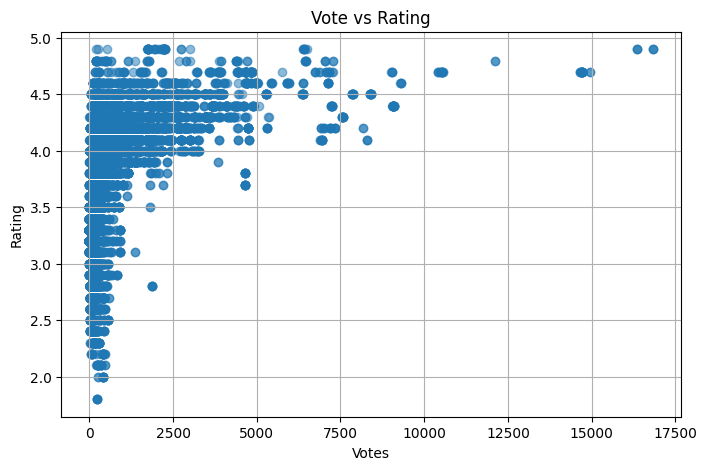

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

clean_df = df[df['rate'].notnull()]

plt.figure(figsize=(8, 5))
plt.scatter( x = clean_df["votes"] , y =clean_df["rate"] , alpha = 0.5)
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Vote vs Rating")
plt.grid(True)
plt.show()


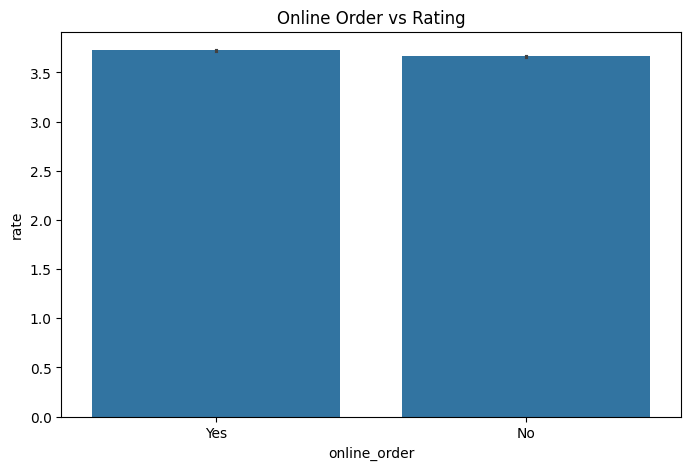

online_order
No     3.662599
Yes    3.723550
Name: rate, dtype: float64


In [9]:
plt.figure(figsize=(8, 5))
sns.barplot( x = "online_order" , y = "rate" , data = clean_df)
plt.title("Online Order vs Rating")
plt.show()
print (clean_df.groupby('online_order')['rate'].mean())

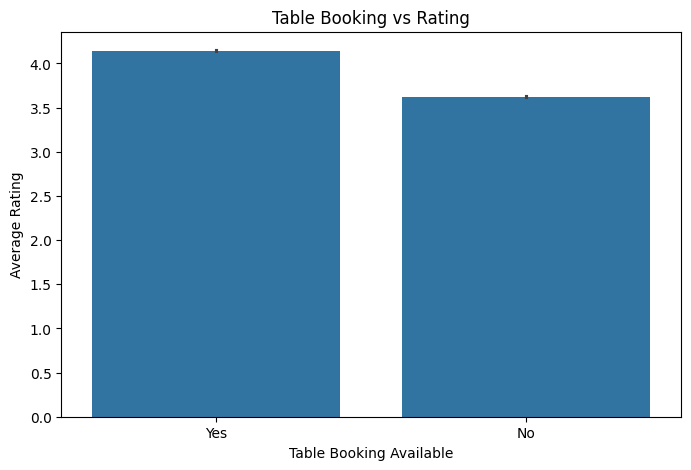

book_table
No     3.622364
Yes    4.143666
Name: rate, dtype: float64

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x="book_table", y="rate", data=clean_df)
plt.title("Table Booking vs Rating")
plt.xlabel("Table Booking Available")
plt.ylabel("Average Rating")
plt.show()
clean_df.groupby("book_table")["rate"].mean()


Location where there are most high rated resturants
location
Lavelle Road             4.141458
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.012821
Church Street            3.991882
Sankey Road              3.965385
Koramangala 4th Block    3.916687
Cunningham Road          3.903712
Residency Road           3.864570
Koramangala 7th Block    3.850295
Name: rate, dtype: float64
Location where there are most low rated resturants
location
Kumaraswamy Layout    3.465190
RT Nagar              3.450847
Magadi Road           3.437500
Nagarbhavi            3.400000
West Bangalore        3.366667
Rammurthy Nagar       3.346154
North Bangalore       3.340000
Peenya                3.200000
Bommanahalli          3.190972
Old Madras Road       3.181818
Name: rate, dtype: float64


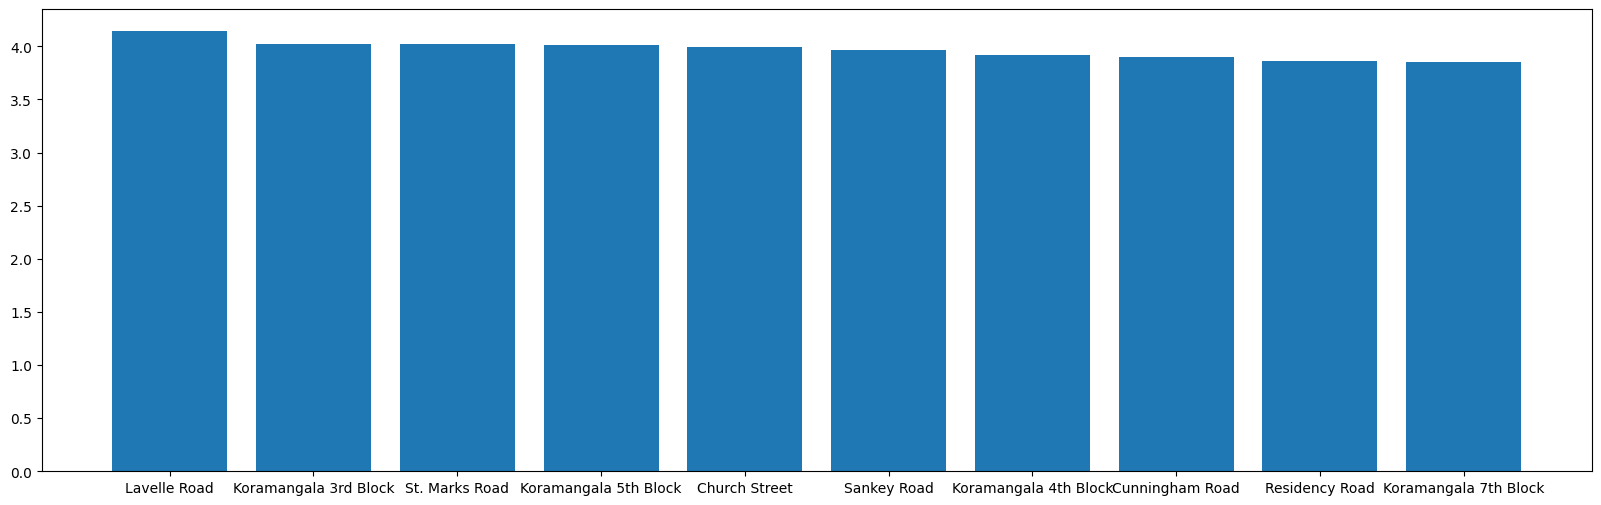

In [11]:
# print (df["location"].nunique())
locating_wise_rating = clean_df.groupby(["location"])["rate"].mean()
a = locating_wise_rating.sort_values(ascending=False).head(10)
print ("Location where there are most high rated resturants")
print (a)
b = locating_wise_rating.sort_values(ascending=False).tail(10)
print ("Location where there are most low rated resturants")
print (b)
plt.figure(figsize=(20, 6))
plt.bar( a.index , a.values)
plt.show()


Top 10 resturant types with highest rating----
rest_type
Pub, Cafe                      4.657500
Bar, Pub                       4.600000
Microbrewery                   4.508333
Pub, Microbrewery              4.452632
Microbrewery, Bar              4.446154
Microbrewery, Pub              4.438095
Casual Dining, Irani Cafee     4.406667
Fine Dining, Lounge            4.400000
Cafe, Lounge                   4.400000
Microbrewery, Casual Dining    4.369421
Name: rate, dtype: float64


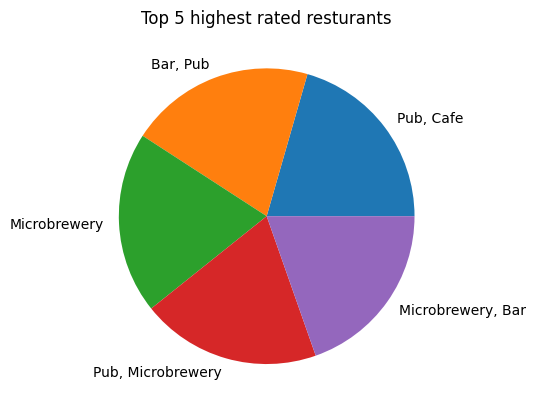

Top 10 resturant types with lowest rating----
rest_type
Bakery, Quick Bites          3.397333
Quick Bites, Cafe            3.330303
Quick Bites, Kiosk           3.300000
Quick Bites, Food Court      3.287500
Dhaba                        3.276471
Bhojanalya                   3.266667
Food Court, Casual Dining    3.240000
Bakery, Beverage Shop        3.200000
Bakery, Food Court           3.000000
Dessert Parlor, Kiosk        3.000000
Name: rate, dtype: float64


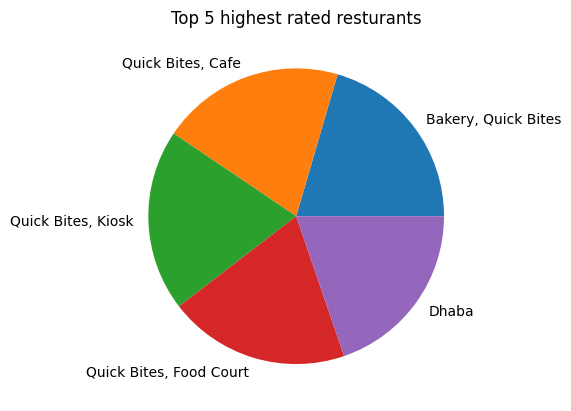

In [12]:
# print (df["rest_type"].nunique())
rest_type_wise_rating = clean_df.groupby("rest_type")["rate"].mean()
print ("Top 10 resturant types with highest rating----")
a =rest_type_wise_rating.sort_values(ascending=False).head(10)
print (a)
plt.pie(a[:5] , labels = a[:5].index)
plt.title("Top 5 highest rated resturants")
plt.show()
print ("Top 10 resturant types with lowest rating----")
b=rest_type_wise_rating.sort_values(ascending=False).tail(10)
print (b)
plt.pie(b[:5] , labels = b[:5].index)
plt.title("Top 5 highest rated resturants")
plt.show()

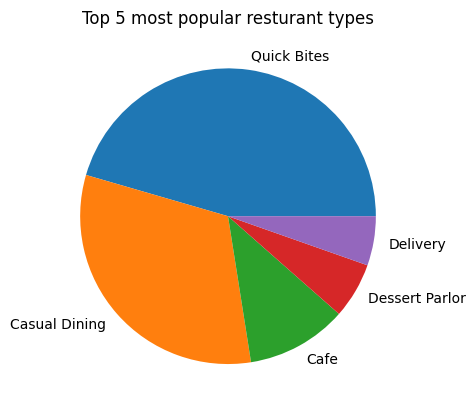

In [13]:
rest_type_count =clean_df["rest_type"].value_counts()
plt.pie(rest_type_count[:5] , labels=rest_type_count.index[:5])
plt.title("Top 5 most popular resturant types")
plt.show()


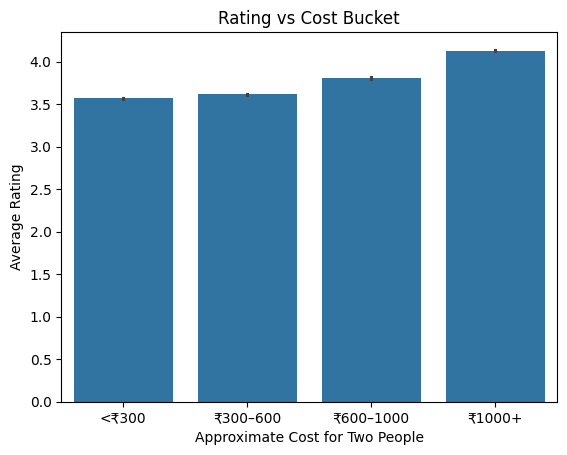

cost_bucket
<₹300        3.571267
₹300–600     3.617306
₹600–1000    3.803961
₹1000+       4.129798
Name: rate, dtype: float64


In [14]:
clean_df = clean_df.copy()
bins = ( 0 , 300 ,  600 , 1000 , float("inf"))
labels = ['<₹300', '₹300–600', '₹600–1000', '₹1000+']
clean_df["cost_bucket"] = pd.cut(clean_df['approx_cost(for two people)'] , bins = bins , labels = labels)
sns.barplot(x='cost_bucket', y='rate', data=clean_df, order=labels)
plt.title("Rating vs Cost Bucket")
plt.xlabel("Approximate Cost for Two People")
plt.ylabel("Average Rating")
plt.show()
print (clean_df.groupby("cost_bucket" , observed= True)["rate"].mean())


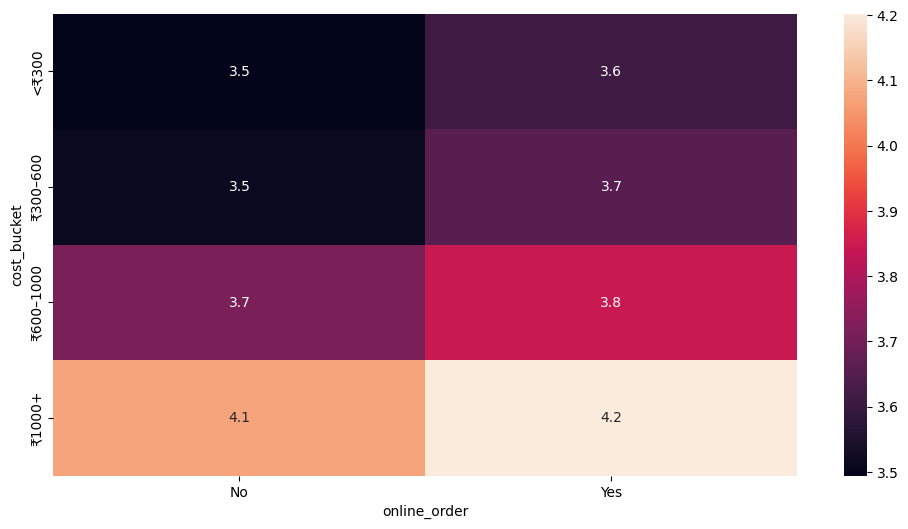

In [15]:
pivot = clean_df.pivot_table( observed=True ,
    index="cost_bucket" , 
    columns="online_order" , 
    values="rate" , 
    aggfunc= "mean"
    
)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot , annot=True)
plt.show()

                                 rate     votes  approx_cost(for two people)
rate                         1.000000  0.434747                     0.384955
votes                        0.434747  1.000000                     0.365199
approx_cost(for two people)  0.384955  0.365199                     1.000000


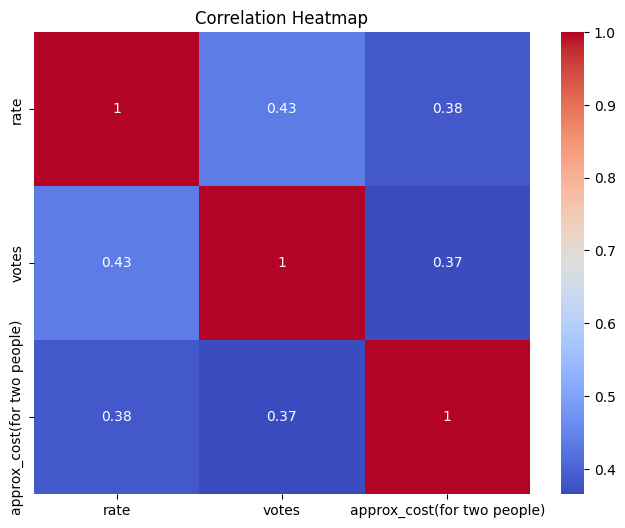

In [16]:
corr_matrix = clean_df[['rate', 'votes', 'approx_cost(for two people)']].corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
print ("Top 10 resturants with highest rating---")
rest_wie_rating = clean_df.groupby("name")["rate"].mean()
print (rest_wie_rating.sort_values(ascending=False ).head(10))
print ("Top 10 resturants with lowest rating---")
rest_wie_rating1 = clean_df.groupby("name")["rate"].mean()
print (rest_wie_rating1.sort_values(ascending=False ).tail(10))


Top 10 resturants with highest rating---
name
Byg Brewski Brewing Company                                                         4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Asia Kitchen By Mainland China                                                      4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
Flechazo                                                                            4.800000
O.G. Variar & Sons                                                                  4.800000
The Pizza Bakery                                                                    4.800000
AB's - Absolute Barbecues                                                           4.789474
Biergarten                                                                          4.766667
Name: rate, dtype: float

In [18]:
print (clean_df.columns)



Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'cost_bucket'],
      dtype='object')


In [19]:
# print (clean_df["cuisines"].isnull().sum())
clean_df_exploded = clean_df.copy()
clean_df_exploded["cuisines"] = clean_df["cuisines"].str.split(",")
clean_df_exploded = clean_df_exploded.explode("cuisines")
clean_df_exploded["cuisines"] = clean_df_exploded["cuisines"].str.strip()
cuisine_rating = clean_df_exploded.groupby(["cuisines"])["rate"].mean()
print ("Top 10 highest cuisines with highest average rating----")
print ( cuisine_rating.sort_values(ascending=False).head(10))

Top 10 highest cuisines with highest average rating----
cuisines
Cantonese        4.600000
African          4.523529
Singaporean      4.414894
Belgian          4.366667
Malaysian        4.315094
Modern Indian    4.308276
Sri Lankan       4.306667
Vegan            4.300000
Jewish           4.300000
German           4.266667
Name: rate, dtype: float64


In [20]:
popular_cuisines = clean_df_exploded["cuisines"].value_counts()
print ("Top 10 most popular cuisines")
print ( popular_cuisines[popular_cuisines > 100].head(10) )

Top 10 most popular cuisines
cuisines
North Indian    16981
Chinese         12761
Fast Food        6257
South Indian     6209
Continental      5120
Biryani          4934
Cafe             4698
Desserts         4379
Beverages        3793
Italian          3135
Name: count, dtype: int64


In [21]:
popular_cuisines = clean_df_exploded.groupby("cuisines").filter(lambda x : len(x) > 50).groupby("cuisines")["rate"].mean()
print ("Top 10 most popular highest rated cuisines")
print (popular_cuisines.sort_values(ascending=False).head(10))

Top 10 most popular highest rated cuisines
cuisines
Malaysian        4.315094
Modern Indian    4.308276
Japanese         4.258235
Mediterranean    4.213187
Konkan           4.170370
European         4.165007
Korean           4.149645
Asian            4.135917
Burmese          4.107273
French           4.091892
Name: rate, dtype: float64


In [22]:
print ("Top rated resturants location wise with vites more than 5000 and online order available---")
top_rated = clean_df[(clean_df["votes"]> 5000) & (clean_df["online_order"] == "No")].groupby(["location", "name"])["rate"].mean().sort_values(ascending=False).head(10)
print(top_rated)


Top rated resturants location wise with vites more than 5000 and online order available---
location               name                     
BTM                    AB's - Absolute Barbecues    4.9
Marathahalli           AB's - Absolute Barbecues    4.8
                       The Black Pearl              4.8
Whitefield             Biergarten                   4.7
HSR                    TBC Sky Lounge               4.7
Indiranagar            Barbeque Nation              4.7
                       Toit                         4.7
Koramangala 5th Block  Truffles                     4.7
Marathahalli           Flechazo                     4.7
Koramangala 5th Block  The Black Pearl              4.7
Name: rate, dtype: float64


In above three block we basically saw 3 types of filtering. One using .filter , other using value_count() amd 3rd using the most basic one.